In [47]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [58]:
df= pd.read_csv("data/training_preprocessed.csv")
y= df.FraudResult
df.drop("FraudResult", axis=1, inplace=True)
X= df
X.drop(["TransactionId"], axis=1, inplace=True)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [60]:
lr= LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [61]:
test_comb = X_test
test_comb["y_true"] = y_test
test_comb["y_pred"] = y_pred
test_comb

,Year,Month,Week,Day,is_workday,is_worktime,SignAmount,ModAmount,ProviderId_1,ProviderId_2,...,batch_size,total_transactions_by_customer,transactions_by_customer_this_month,transactions_by_customer_this_week,transactions_by_customer_this_day,day_vs_week,day_vs_month,week_vs_month,y_true,y_pred
9354,2018,11,48,27,1,1,1,3000.0,0,0,...,1,260,135,55,9,0.163636,0.066667,0.407407,0,0
35705,2018,12,51,21,1,1,1,5000.0,0,0,...,1,10,6,6,6,1.000000,1.000000,1.000000,0,0
41252,2018,12,52,26,1,1,1,1000.0,0,0,...,1,1869,1264,317,65,0.205047,0.051424,0.250791,0,0
48404,2019,1,1,1,1,1,1,1000.0,0,0,...,1,10,7,2,2,1.000000,0.285714,0.285714,0,0
18476,2018,12,49,6,1,1,0,235.0,0,0,...,1,273,200,14,4,0.285714,0.020000,0.070000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72218,2019,1,4,25,1,1,1,1100.0,0,0,...,1,1869,487,123,35,0.284553,0.071869,0.252567,0,0
4766,2018,11,47,20,1,0,0,20.0,0,0,...,1,72,72,48,15,0.312500,0.208333,0.666667,0,0
73408,2019,1,4,25,1,0,1,5000.0,1,0,...,1,37,16,7,3,0.428571,0.187500,0.437500,0,0
42593,2018,12,52,27,1,1,0,55.0,0,0,...,1,610,494,465,202,0.434409,0.408907,0.941296,0,0


In [68]:
false_positive = test_comb[test_comb.y_true < test_comb.y_pred]
false_negative = test_comb[test_comb.y_true > test_comb.y_pred]
correct = test_comb[test_comb.y_true == test_comb.y_pred]
true_positive = correct[correct.y_pred == 1]
true_negative = correct[correct.y_pred == 0]

In [69]:
print(false_positive.shape[0])
print(false_negative.shape[0])
print(true_positive.shape[0])
print(true_negative.shape[0])

10
31
17
23858


In [71]:
recall= true_positive.shape[0] / (true_positive.shape[0]+false_negative.shape[0])
print(recall)

0.3541666666666667


<AxesSubplot:xlabel='ModAmount', ylabel='Count'>

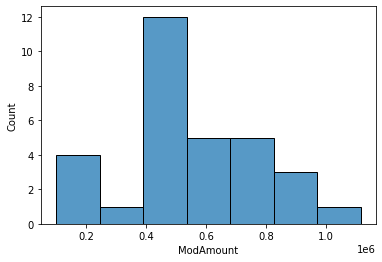

In [74]:
import seaborn as sns
sns.histplot(data= false_negative, x="ModAmount")

<AxesSubplot:xlabel='ModAmount', ylabel='Count'>

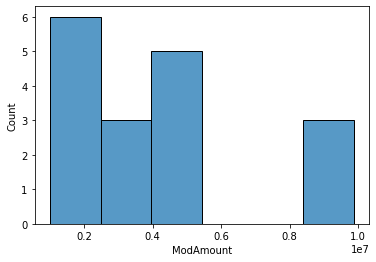

In [75]:
sns.histplot(data= true_positive, x="ModAmount")

In [76]:
false_negative.ModAmount.sum()

17293095.0

In [77]:
true_positive.ModAmount.sum()

71589988.0